In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import plotly.express as px

In [20]:
df = pd.read_excel('DataBase.xlsx', sheet_name='all')
df.head()

,id,mat,name,activitie
0,NaN,202427050021,ABEL VIEIRA DE RESENDE,abertura
1,NaN,202417150210,ACSA ASSIS PONZO MARTINS,abertura
2,NaN,202417280083,ADRIANE MORAES DE SOUZA,abertura
3,NaN,202427050188,ADRIANO ROBAINA ALVES SILVA,abertura
4,NaN,202417050290,ALAN MENESCAL CÁCERES,abertura


In [21]:
courses = [
    {'label': 'Engenharia de Controle e Automação', 'value': 'ECA', 'code': 705},
    {'label': 'Engenharia Elétrica', 'value': 'EE', 'code': 717},
    {'label': 'História', 'value': 'HIST', 'code': 719},
    {'label': 'Técnico de Automação', 'value': 'TEC_AUTO', 'code': 901},
    {'label': 'Técnico de Automação', 'value': 'TEC_AUTO', 'code': 911},
    {'label': 'Técnico de Eletromecânica', 'value': 'TEC_ELETMC', 'code': 914},
    {'label': 'Técnico de Eletromecânica', 'value': 'TEC_ELETMC', 'code': 994},
    {'label': 'Técnico de Eletrônica', 'value': 'TEC_ELET', 'code': 915},
    {'label': 'Técnico de Eletrônica', 'value': 'TEC_ELET', 'code': 905},
    {'label': 'Técnico de Meio Ambiente', 'value': 'TEC_MEIO', 'code': 708},
    {'label': 'Técnico de Meio Ambiente', 'value': 'TEC_ELET', 'code': 728},
    {'label': 'Técnico de Segurança do Trabalho', 'value': 'TEC_SEG', 'code': 909},
    {'label': 'Público Externo', 'value': 'EXT', 'code': -1},
]

def formatMat(mat):
    mat = mat.replace(' ', '').replace('-', '').replace(',', '').replace('.', '').strip()

    if len(mat) != 12 or not mat.isdigit():
        return None

    return mat

def getPeriodo(mat):
    mat = formatMat(mat)

    if mat is None:
        return 0
    
    startYear = int(mat[:4])
    startDiv  = int(mat[4])
    
    currentYear = datetime.now().year
    periodo = 2*(currentYear - startYear + 1) - (startDiv - 1)

    if periodo < 1:
        return 0

    return 10 if periodo > 10 else periodo

def getCourse(mat):
    mat = formatMat(mat)

    if mat is None:
        return courses[-1]['label']
    
    target = int(mat[5:8])

    for course in courses:
        if course['code'] == target:
            return course['label']

    return courses[-1]['label']


def getCourseValue(mat):
    mat = formatMat(mat)

    if mat is None:
        return courses[-1]['value']
    
    target = int(mat[5:8])

    for course in courses:
        if course['code'] == target:
            return course['value']

    return courses[-1]['value']


df['periodo'] = df.mat.apply(getPeriodo)
df['course'] = df.mat.apply(getCourse)
df['course_val'] = df.mat.apply(getCourseValue)
df['graduation'] = (df.course_val == 'ECA') | (df.course_val == 'EE') | (df.course_val == 'HIST') 
df.head()

,id,mat,name,activitie,periodo,course,course_val,graduation
0,NaN,202427050021,ABEL VIEIRA DE RESENDE,abertura,1,Engenharia de Controle e Automação,ECA,True
1,NaN,202417150210,ACSA ASSIS PONZO MARTINS,abertura,2,Público Externo,EXT,False
2,NaN,202417280083,ADRIANE MORAES DE SOUZA,abertura,2,Técnico de Meio Ambiente,TEC_ELET,False
3,NaN,202427050188,ADRIANO ROBAINA ALVES SILVA,abertura,1,Engenharia de Controle e Automação,ECA,True
4,NaN,202417050290,ALAN MENESCAL CÁCERES,abertura,2,Engenharia de Controle e Automação,ECA,True


In [22]:
import json

with open('activities.json', encoding='utf-8') as file:
    activities = json.load(file)

activities[0]

{'label': 'Abertura da XI SECAE - Brindes, Sorteios e Horas Complementares',
 'value': 'abertura',
 'time': '25 de novembro 17h - 17h30',
 'area': 'IFF'}

In [23]:
def getTimeFrom(activitie):
    global activities

    for activ in activities:
        if activ['value'] == activitie:
            return activ['time']
        
    return None

def getArea(activitie):
    global activities

    for activ in activities:
        if activ['value'] == activitie:
            return activ['area']
        
    return None

df['time'] = df.activitie.apply(getTimeFrom)
df['area'] = df.activitie.apply(getArea)
df.head()

,id,mat,name,activitie,periodo,course,course_val,graduation,time,area
0,NaN,202427050021,ABEL VIEIRA DE RESENDE,abertura,1,Engenharia de Controle e Automação,ECA,True,25 de novembro 17h - 17h30,IFF
1,NaN,202417150210,ACSA ASSIS PONZO MARTINS,abertura,2,Público Externo,EXT,False,25 de novembro 17h - 17h30,IFF
2,NaN,202417280083,ADRIANE MORAES DE SOUZA,abertura,2,Técnico de Meio Ambiente,TEC_ELET,False,25 de novembro 17h - 17h30,IFF
3,NaN,202427050188,ADRIANO ROBAINA ALVES SILVA,abertura,1,Engenharia de Controle e Automação,ECA,True,25 de novembro 17h - 17h30,IFF
4,NaN,202417050290,ALAN MENESCAL CÁCERES,abertura,2,Engenharia de Controle e Automação,ECA,True,25 de novembro 17h - 17h30,IFF


In [24]:
import re

def getRealTime(time):
    year  = 2024
    month = 11
    day = int(time.split(' de ')[0])
    startTime = int(re.search(r"(\d{1,2})h", time).group(1))
    return pd.Timestamp(year=year, month=month, day=day, hour=startTime)

df['time'] = df.time.apply(getRealTime)
df.head()

,id,mat,name,activitie,periodo,course,course_val,graduation,time,area
0,NaN,202427050021,ABEL VIEIRA DE RESENDE,abertura,1,Engenharia de Controle e Automação,ECA,True,2024-11-25 17:00:00,IFF
1,NaN,202417150210,ACSA ASSIS PONZO MARTINS,abertura,2,Público Externo,EXT,False,2024-11-25 17:00:00,IFF
2,NaN,202417280083,ADRIANE MORAES DE SOUZA,abertura,2,Técnico de Meio Ambiente,TEC_ELET,False,2024-11-25 17:00:00,IFF
3,NaN,202427050188,ADRIANO ROBAINA ALVES SILVA,abertura,1,Engenharia de Controle e Automação,ECA,True,2024-11-25 17:00:00,IFF
4,NaN,202417050290,ALAN MENESCAL CÁCERES,abertura,2,Engenharia de Controle e Automação,ECA,True,2024-11-25 17:00:00,IFF


In [25]:
target = df.drop_duplicates(subset='mat')

print('total de alunos: ', len(target))
print('graduação: ', target.graduation.sum())
print('técnico: ', (~target.graduation).sum())

total de alunos:  578
graduação:  307
técnico:  271


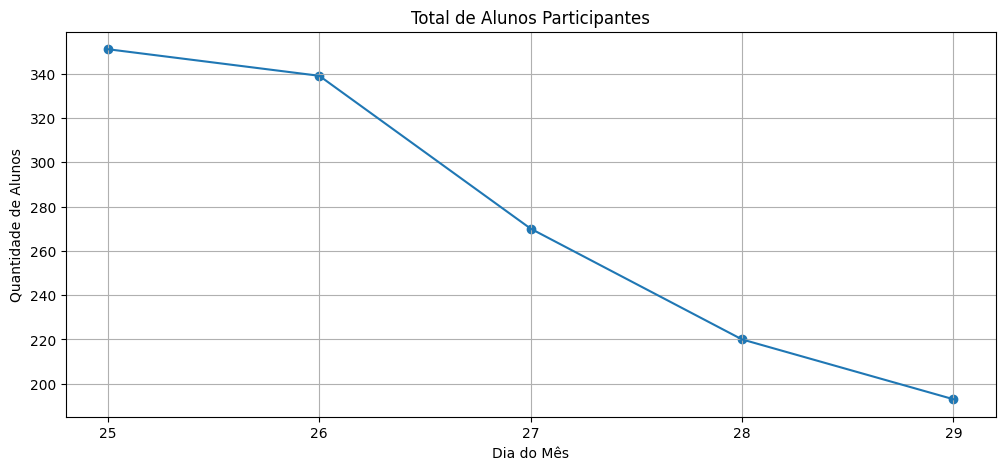

In [26]:
days = sorted(df.time.dt.day.unique().tolist())
total = [len(df.loc[df.time.dt.day == day].drop_duplicates(subset='mat')) for day in days]

plt.figure(figsize=(12, 5))
plt.plot(days, total)
plt.scatter(days, total)
plt.title('Total de Alunos Participantes')
plt.xlabel('Dia do Mês')
plt.ylabel('Quantidade de Alunos')
plt.xticks([int(val) for val in days])
plt.grid()

In [34]:
target = df.loc[
    (df.activitie != 'ieee') & 
    (df.activitie != 'atletica') & 
    (df.activitie != 'maker') & 
    (df.activitie != 'empresa_junior')
] # essas palestras são copias

xData = target.groupby('time').size().index
yData = target.groupby('time').size()

activities_df = pd.DataFrame({'time': xData, 'quantity': yData})
display(activities_df.head())

fig = px.line(activities_df, x='time', y='quantity') #color='humidity'
fig.update_layout(width=1000, height=500, title='Registros de Presença', xaxis_title='Data/Hora', yaxis_title='Nº de Registros')
fig.update_layout(template='xgridoff')  # Pode ser 'plotly', 'plotly_dark', 'ggplot2', 'seaborn', etc.

fig.show()

,time,quantity
time,,
2024-11-25 17:00:00,2024-11-25 17:00:00,279
2024-11-25 19:00:00,2024-11-25 19:00:00,212
2024-11-26 08:00:00,2024-11-26 08:00:00,14
2024-11-26 10:00:00,2024-11-26 10:00:00,13
2024-11-26 13:00:00,2024-11-26 13:00:00,89


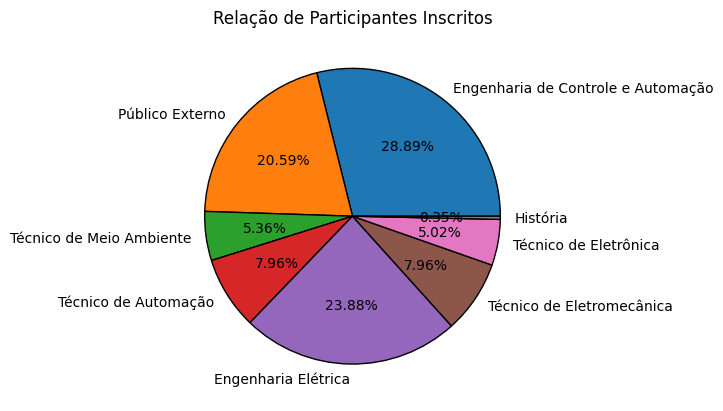

In [28]:
target = df.drop_duplicates(subset='mat')

labels = target.course.unique()
values = [(target.course == course).sum() for course in labels]

plt.title('Relação de Participantes Inscritos')
plt.pie(values, labels=labels, autopct='%.2f%%', wedgeprops={'edgecolor': 'black'})

plt.show()

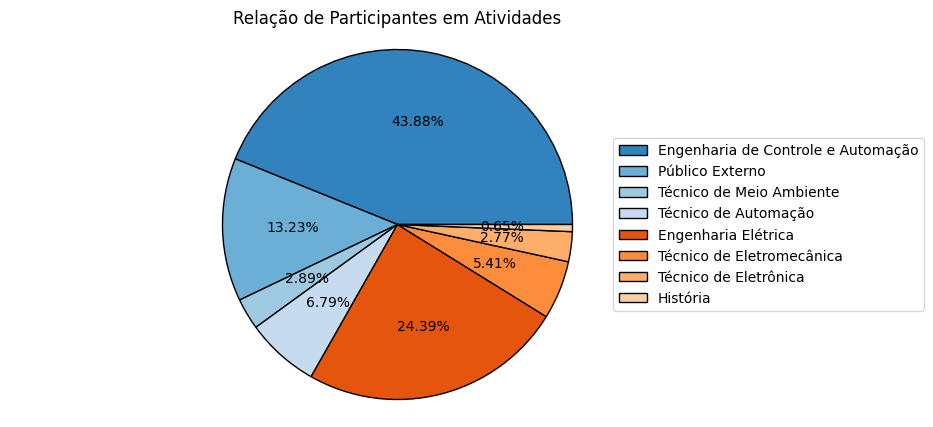

In [29]:
labels = df.course.unique()
values = [(df.course == course).sum() for course in labels]

plt.figure(figsize=(10, 5))
plt.pie(values, autopct='%.2f%%', wedgeprops={'edgecolor': 'black'}, colors=plt.cm.tab20c.colors)
plt.title('Relação de Participantes em Atividades')
plt.legend(labels, loc='center right', borderaxespad=-10)
plt.axis('equal')
plt.show()

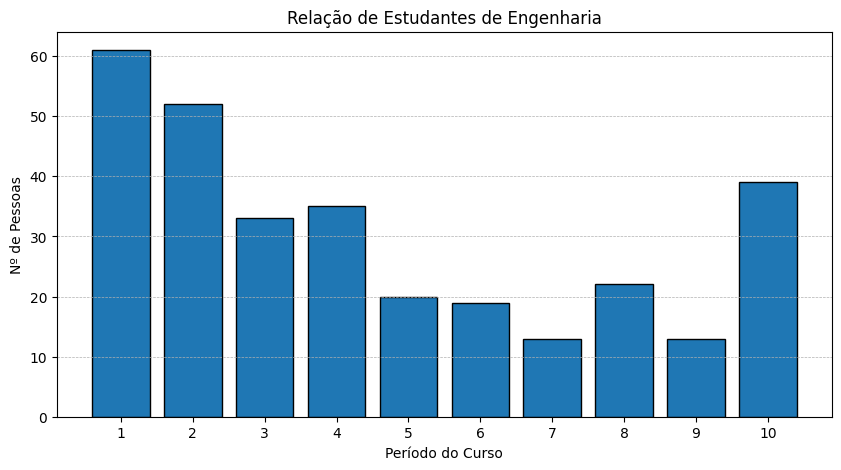

In [30]:
target = df.loc[(df.course_val == 'ECA') | (df.course_val == 'EE') | (df.course_val == 'HIST')].drop_duplicates(subset='mat')

labels = list(range(1, 11))
values = [(target.periodo == periodo).sum() for periodo in labels]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, edgecolor='black')
plt.xticks(labels)
plt.title('Relação de Estudantes de Engenharia')
plt.xlabel('Período do Curso')
plt.ylabel('Nº de Pessoas')
plt.grid(axis='y', linewidth=0.5, linestyle='--')
plt.show()

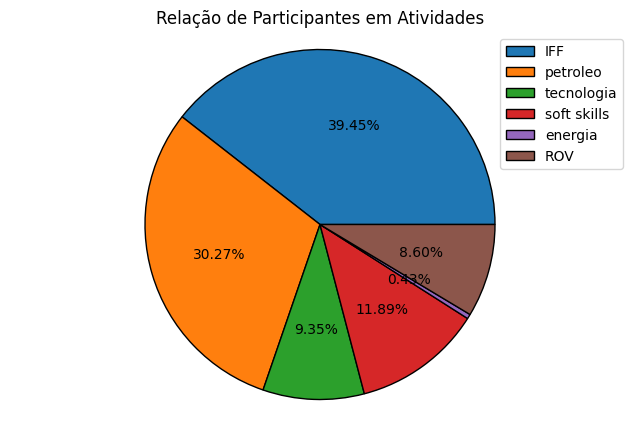

In [35]:
labels = df.area.unique()
values = [(df.area == area).sum() for area in labels]

plt.figure(figsize=(8, 5))
plt.pie(values, autopct='%.2f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Relação de Participantes em Atividades')
plt.legend(labels)
plt.axis('equal')
plt.show()